In [7]:
import sys

sys.path.append("/home/dah/nlp/word2vect/src/")
from word2vect import Word2vect
from dataset_processor import Word2VectPreprocessor
from cross_entropy import CrossEntropyLoss
from optimizer import Optimizer
from embedding import Embedding
from trainer import Trainer

In [8]:
EMBEDDING_DIM = 50
EPOCHS = 150
BATCH_SIZE = 64
CONTEXT_WINDOW = 3
LEARNING_RATE = 1e-3

In [9]:
processor = Word2VectPreprocessor()
data = processor.load_data(["/home/dah/nlp/word2vect/dataset/shakespeare.txt"])
processor.build_vocab(data=data)
# X, y = next(processor.create_batch(data = data, context_window = 5, batch_size = 10))
VOCAB_SIZE = processor.V


In [10]:
model = Word2vect(embedding_dim=EMBEDDING_DIM, vocab_size=VOCAB_SIZE, random_state=42)

In [11]:
optimizer = Optimizer(learning_rate = LEARNING_RATE)
loss_fn = CrossEntropyLoss()

In [12]:
trainer = Trainer(model = model, optimizer = optimizer, loss_fn=loss_fn, data_processor= processor)

In [13]:
trainer.train(data = data,epochs=EPOCHS, batch_size=BATCH_SIZE, context_window= CONTEXT_WINDOW)

Epoch 10, Loss: 7.649169
Epoch 20, Loss: 7.322247
Epoch 30, Loss: 7.141423
Epoch 40, Loss: 7.005360
Epoch 50, Loss: 6.895554
learning rate : 0.0005
Epoch 60, Loss: 6.851802
Epoch 70, Loss: 6.812154
Epoch 80, Loss: 6.778128
Epoch 90, Loss: 6.748880
Epoch 100, Loss: 6.723513
learning rate : 0.00025
Epoch 110, Loss: 6.713573
Epoch 120, Loss: 6.702796
Epoch 130, Loss: 6.692588
Epoch 140, Loss: 6.682880
Epoch 150, Loss: 6.673607
learning rate : 0.000125


In [15]:
embedding_model = Embedding(model=model, word2Ind= processor.word2Ind, ind2Word=processor.ind2Word, metric= 'cosine')

In [16]:
embedding_model.embedding('Italy')

array([0.30884769, 0.29002241, 0.78342781, 0.23715287, 0.42267997,
       0.42537201, 0.70394555, 0.27812907, 0.80257338, 0.08780768,
       0.54838449, 0.57710479, 0.64989317, 0.25222175, 0.49514414,
       0.47389222, 0.40768202, 0.41939296, 0.61335308, 0.52732444,
       0.81215234, 0.46908925, 0.52496249, 0.60162451, 0.47013703,
       0.76924384, 0.36903188, 0.56789467, 0.43267715, 0.17006891,
       0.36559569, 0.61334807, 0.49752399, 0.534874  , 0.65993573,
       0.33395652, 0.25673255, 0.06462583, 0.76096405, 0.51005417,
       0.27772749, 0.62302446, 0.43597013, 0.15161378, 0.49751159,
       0.80013456, 0.63807776, 0.30250365, 0.37039317, 0.27438609])

In [17]:
words = ['king', 'queen','lord','man', 'woman','dog','wolf',
         'rich','happy','sad']

X = embedding_model.batch_embedding(words=words)
 
# given a list of words and the embeddings, it returns a matrix with all the embeddings
# idx = [processor.word2Ind[word] for word in words]
# X = embs[:, idx]
# print(X.shape, idx)  # X.shape:  Number of words of dimension N each 
X.shape

(10, 50)

In [18]:
X.shape

(10, 50)

In [19]:
from sklearn.decomposition import PCA
compute_pca = PCA(n_components=2)
from matplotlib import pyplot

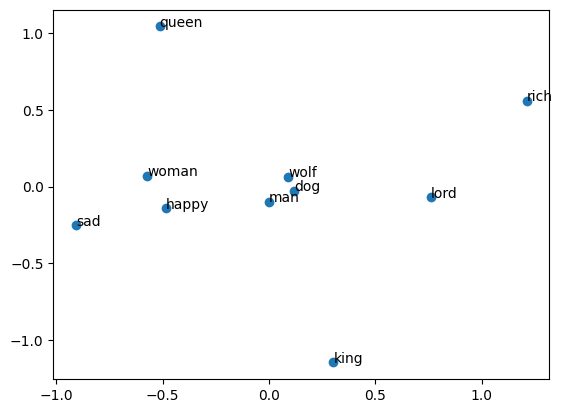

In [21]:
result= compute_pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()